# Week9

In [200]:
joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
144,1048635,7004,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
145,1048635,9103,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
146,1048635,9103,P,1,13.0,9.99,6.94,13.0,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,6,2067178,WESTPOIN,Other,Other
168,1058635,4409,R,1,10.0,7.99,4.56,10.0,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,6,2067178,WESTPOIN,Other,Other
169,1058635,4409,R,1,10.0,7.99,4.56,10.0,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,6,2067178,WESTPOIN,Other,Other


In [201]:
grouped_data = joined_drop.groupby('sku')['retail'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='retail', ascending=False)
sorted_data

,sku,retail
1095,5528349,20129.50
175,994478,10147.00
667,3524026,10097.00
1815,9288109,9602.00
1406,7388142,9027.00
...,...,...
770,3906297,1.25
1488,7922709,1.25
757,3846297,1.25
1042,5196618,1.00


## Feature Engineering

we decide to select the following features:<br>
and they could be divided into 2 categories

categorical:
- style
- standardized_color
- standardized_size
- vendor
- brand

numerical:
- retail price
- packsize

In [202]:
joined_drop["style"].value_counts() 

style
62A4       1112
2410       1040
645J        962
8F30G61     756
2228        746
           ... 
F81S550     106
6CLW        106
0589        105
R315        104
3543        104
Name: count, Length: 134, dtype: int64

In [203]:
joined_drop['vendor'].value_counts() 

vendor
5511283    14724
113645      5330
3626213     1807
2012863     1288
2067178     1101
13031       1026
313319       722
2017178      660
6076489      508
7016341      442
9520439      397
4516339      343
6016957      328
3216218      315
5011295      290
11679        262
8011482      241
6919400      231
7326340      207
3813315      177
1116343      153
1426212      150
6013105      146
7025617      120
6014375      106
Name: count, dtype: int64

In [204]:
len(joined_drop['vendor'].value_counts())

25

In [205]:
joined_drop['brand'].value_counts()

brand
CLINIQUE    14724
LANCOME      5330
CABERNET     2926
MILCO IN     1807
WESTPOIN     1101
HUE           816
NOBLE EX      739
LEVI STR      614
MAIN KNI      442
NOBILITY      315
GREAT AM      290
DESIGNER      262
CROSCILL      241
HUE/KAYS      210
TROPICAL      207
TOMMY HI      177
BURLEN C      160
EUROITAL      153
NOBLE CH      152
ROUNDTRE      150
HENSON-K      138
ROCHESTE      120
Name: count, dtype: int64

standardize retail price and packsize

In [206]:
from sklearn.preprocessing import StandardScaler

# StandardScaler will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1.
scaler = StandardScaler()

# Scale the 'retail' and 'packsize' columns
joined_drop[['retail', 'packsize']] = scaler.fit_transform(joined_drop[['retail', 'packsize']])

In [207]:
joined_drop[['retail','packsize']]

,retail,packsize
144,-0.362679,1.804921
145,-0.362679,1.804921
146,-0.362679,1.804921
168,-0.660968,1.804921
169,-0.660968,1.804921
...,...,...
98183,-0.263250,-0.141973
98184,-0.263250,-0.141973
98185,-0.263250,-0.141973
98186,-0.263250,-0.141973


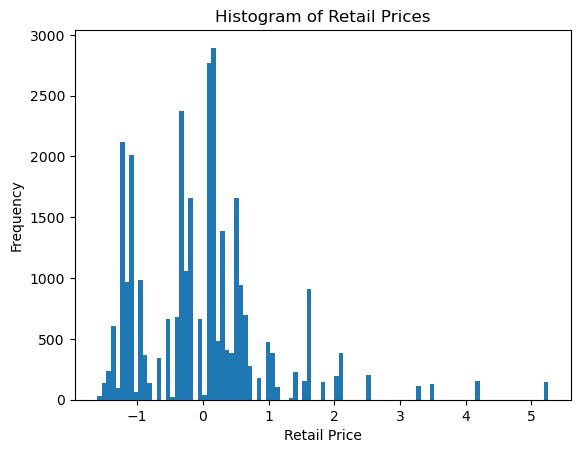

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'joined_drop' is your pandas DataFrame and it's already loaded

# Create a histogram for the 'retail' column
plt.hist(joined_drop['retail'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

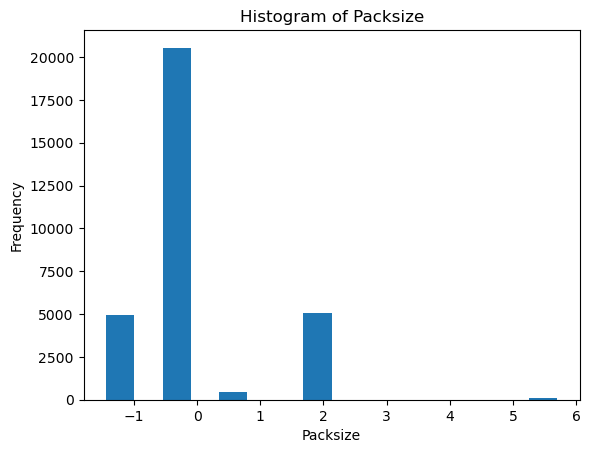

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'joined_drop' is your pandas DataFrame and it's already loaded

# Create a histogram for the 'retail' column
plt.hist(joined_drop['packsize'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Packsize')
plt.xlabel('Packsize')
plt.ylabel('Frequency')

# Show the plot
plt.show()

I don't think we need to drop ourliers here because it is normal that Dillard sells a wide range of packsize and retail prices.

Now 'retail' and 'packsize' have been standardized.

proceed with only selected features for x matrix

In [152]:
joined_drop.stype.value_counts()

stype
P    6627
R     232
Name: count, dtype: int64

In [55]:
return_percentage=(937/18676)*100
return_percentage

5.017134289997858

In [208]:
joined_drop.head()

,sku,store,stype,quantity,orgprice,amt,cost,retail,dept,classid,upc,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
144,1048635,7004,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
145,1048635,9103,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
146,1048635,9103,P,1,13.0,9.99,6.94,-0.362679,6107,001,400008635104,8F30G61,FRESCO YEL,BATH,1.804921,2067178,WESTPOIN,Other,Other
168,1058635,4409,R,1,10.0,7.99,4.56,-0.660968,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,1.804921,2067178,WESTPOIN,Other,Other
169,1058635,4409,R,1,10.0,7.99,4.56,-0.660968,6107,001,400008635105,8F30G61,FRESCO YEL,HAND,1.804921,2067178,WESTPOIN,Other,Other


Since we want to investigate whether customer would return or purchase a product based on its features, we must make this sample into a balanced dataset first, we decide to use SMOTE - Synthetic Minority Over-sampling Technique to make it into a balanced dataset.

The regression would focus on whether the product would be returned or not and it could further predict some unknow data. 

Then, we move to K-means to decide What products features would be returned most if they are returned. If they are sold, what product features would be sold best.


regression outline:<br>
y:stype (P or R)<br>
x matrix: retail price, style, standardized_color, standardized_size,packsize, vendor, brand